In [399]:
##VERY IMPORTANT OR PLOTS FROM MATPLOT WILL NOT SHOW! IT TOOK AN HOUR FOR ME TO FIGURE THIS OUT!##
%matplotlib inline 
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config IPCompleter.greedy=True #Turn on AutoComplete
sns.set_style('whitegrid')

#######Temp
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier
###EndTemp

In [400]:
kobe_df = pd.read_csv("project2Data.csv")
#kobe_df = pd.read_csv("data.csv")

#kobe_df.set_index('shot_id', inplace=True)
#kobe_df["action_type"] = kobe_df["action_type"].astype('object')
#kobe_df["combined_shot_type"] = kobe_df["combined_shot_type"].astype('category')
#kobe_df["game_event_id"] = kobe_df["game_event_id"].astype('category')
#kobe_df["game_id"] = kobe_df["game_id"].astype('category')
#kobe_df["period"] = kobe_df["period"].astype('object')
#kobe_df["playoffs"] = kobe_df["playoffs"].astype('category')
#kobe_df["season"] = kobe_df["season"].astype('category')
#kobe_df["shot_made_flag"] = kobe_df["shot_made_flag"].astype('category')
#kobe_df["shot_type"] = kobe_df["shot_type"].astype('category')
#kobe_df["team_id"] = kobe_df["team_id"].astype('category')

pd.set_option('display.max_columns', None) #Displays All the columns
print("Dataset has {} entries and {} features".format(*kobe_df.shape))

# preview data
kobe_df.head()

Dataset has 25697 entries and 29 features


,recId,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,attendance,arena_temp,avgnoisedb
0,1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,2,14707,69,94.06
1,2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,3,14707,69,94.06
2,3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,4,14707,69,94.06
3,4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,5,14707,69,94.06
4,5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,6,14707,69,94.06


In [401]:
kobe_df.groupby('shot_made_flag').size()

shot_made_flag
0    14232
1    11465
dtype: int64

In [402]:
pandas_profiling.ProfileReport(kobe_df)

Number of variables,29
Number of observations,25697
Total Missing (%),0.0%
Total size in memory,5.7 MiB
Average record size in memory,232.0 B
Numeric,12
Categorical,10
Boolean,1
Date,0
Text (Unique),0
Rejected,6


In [403]:
profile = pandas_profiling.ProfileReport(kobe_df)
profile.to_file(outputfile="data_analysis.html")

You can see a HTML version of the data located [here](data_analysis.html).

In [404]:
# check how many missing values each feature contains
kobe_df.isnull().sum(axis = 0)

recId                 0
action_type           0
combined_shot_type    0
game_event_id         0
game_id               0
lat                   0
loc_x                 0
loc_y                 0
lon                   0
minutes_remaining     0
period                0
playoffs              0
season                0
seconds_remaining     0
shot_distance         0
shot_made_flag        0
shot_type             0
shot_zone_area        0
shot_zone_basic       0
shot_zone_range       0
team_id               0
team_name             0
game_date             0
matchup               0
opponent              0
shot_id               0
attendance            0
arena_temp            0
avgnoisedb            0
dtype: int64

## Detect and remove outliers

In [405]:
def detect_outliers(series, whis=1.5):
    q75, q25 = np.percentile(series, [75 ,25])
    iqr = q75 - q25
    return ~((series - series.median()).abs() <= (whis * iqr))

## For now - do not remove anything

In [406]:
pd.set_option('display.max_columns', None) #Displays All the columns
print("Dataset has {} entries and {} features".format(*kobe_df.shape))

# preview data
kobe_df.head()

Dataset has 25697 entries and 29 features


,recId,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,attendance,arena_temp,avgnoisedb
0,1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,2,14707,69,94.06
1,2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,3,14707,69,94.06
2,3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,4,14707,69,94.06
3,4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,5,14707,69,94.06
4,5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,10/31/00,LAL @ POR,POR,6,14707,69,94.06


In [407]:
kobe_df.describe(include=['number'])

,recId,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id,attendance,arena_temp,avgnoisedb
count,25697.000000,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000
mean,15326.181188,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946,15040.683621,70.107717,94.951369
std,8860.246845,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397,1076.226662,2.030165,2.281707
min,1.000000,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000,11065.000000,64.000000,88.560000
25%,7646.000000,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000,14314.000000,69.000000,93.400000
50%,15333.000000,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000,15048.000000,70.000000,94.920000
75%,22973.000000,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000,15738.000000,71.000000,96.490000
max,30692.000000,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000,20845.000000,79.000000,102.430000


In [408]:
kobe_df.dtypes

recId                   int64
action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag          int64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
attendance              int64
arena_temp              int64
avgnoisedb            float64
dtype: object

# Data Visualization
See target class distribution

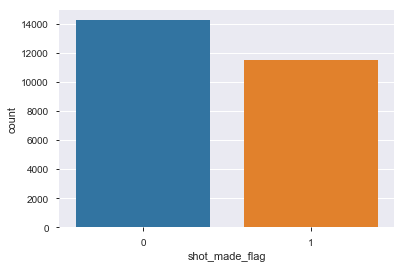

In [409]:
import seaborn as sns
%matplotlib inline
#sns.set(style="darkgrid")
#ax = plt.axes()
#sns.countplot(x='shot_made_flag', data=kobe_df, ax=ax);
#ax.set_title('Target class distribution')
#plt.show()

#kobe_df= sns.load_dataset("kobe_df")
ax = sns.countplot(x="shot_made_flag", data=kobe_df)
plt.show()

In [410]:
#f, axarr = plt.subplots(5, 2, figsize=(15, 15))
#
#sns.boxplot(x='lat', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[0,0])
#sns.boxplot(x='attendance', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[0, 1])
#sns.boxplot(x='loc_y', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[1, 0])
#sns.boxplot(x='loc_x', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[1, 1])
#sns.boxplot(x='minutes_remaining', y='shot_made_flag', showmeans=True, data=kobe_df, ax=axarr[2, 0])
#sns.boxplot(x='seconds_remaining', y='shot_made_flag', showmeans=True, data=kobe_df, ax=axarr[2, 1])
#sns.boxplot(x='shot_distance', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[3, 0])
#sns.boxplot(x='arena_temp', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[3, 1])
#sns.boxplot(x='avgnoisedb', y='shot_made_flag', data=kobe_df, showmeans=True, ax=axarr[4, 0])
#
#axarr[0, 0].set_title('Latitude')
#axarr[0, 1].set_title('attendance')
#axarr[1, 0].set_title('Loc y')
#axarr[1, 1].set_title('Loc x')
#axarr[2, 0].set_title('Minutes remaining')
#axarr[2, 1].set_title('Seconds remaining')
#axarr[3, 0].set_title('Shot distance')
#axarr[3, 1].set_title('Arena Temp')
#axarr[4, 0].set_title('Average DB')
#
#plt.tight_layout()
#plt.show()

In [411]:
#f, axarr = plt.subplots(8, figsize=(15, 25))
#
#sns.countplot(x="combined_shot_type", hue="shot_made_flag", data=kobe_df, ax=axarr[0])
#sns.countplot(x="season", hue="shot_made_flag", data=kobe_df, ax=axarr[1])
#sns.countplot(x="period", hue="shot_made_flag", data=kobe_df, ax=axarr[2])
#sns.countplot(x="playoffs", hue="shot_made_flag", data=kobe_df, ax=axarr[3])
#sns.countplot(x="shot_type", hue="shot_made_flag", data=kobe_df, ax=axarr[4])
#sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=kobe_df, ax=axarr[5])
#sns.countplot(x="shot_zone_basic", hue="shot_made_flag", data=kobe_df, ax=axarr[6])
#sns.countplot(x="shot_zone_range", hue="shot_made_flag", data=kobe_df, ax=axarr[7])
#
#axarr[0].set_title('Combined shot type')
#axarr[1].set_title('Season')
#axarr[2].set_title('Period')
#axarr[3].set_title('Playoffs')
#axarr[4].set_title('Shot Type')
#axarr[5].set_title('Shot Zone Area')
#axarr[6].set_title('Shot Zone Basic')
#axarr[7].set_title('Shot Zone Range')
#
#plt.tight_layout()
#plt.show()

In [412]:
# Computing IQR
#Q1 = kobe_df['shot_distance'].quantile(0.25)
#Q3 = kobe_df['shot_distance'].quantile(0.75)
#IQR = Q3 - Q1
#IQR = Q3
#IQR
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
#filtered = kobe_df.query('(@Q1 - 1.5 * @IQR) <= shot_distance <= (@Q3 + 1.5 * @IQR)')
#filtered = kobe_df.query('shot_made_flag <= (@Q3 + 1.5 * @IQR)')
#filtered.describe(include=['number'])

In [413]:
#kobe_df.join(filtered, rsuffix='_filtered').boxplot()

In [414]:
#kobe_df = kobe_df[(kobe_df['shot_distance'] < 23)]
kobe_df.loc[kobe_df['shot_distance'] == 24,'shot_made_flag'] = 0

In [415]:
kobe_df.describe(include=['number'])

,recId,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id,attendance,arena_temp,avgnoisedb
count,25697.000000,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000
mean,15326.181188,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.428260,1.610613e+09,15328.166946,15040.683621,70.107717,94.951369
std,8860.246845,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.494836,0.000000e+00,8860.462397,1076.226662,2.030165,2.281707
min,1.000000,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000,11065.000000,64.000000,88.560000
25%,7646.000000,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000,14314.000000,69.000000,93.400000
50%,15333.000000,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000,15048.000000,70.000000,94.920000
75%,22973.000000,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000,15738.000000,71.000000,96.490000
max,30692.000000,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000,20845.000000,79.000000,102.430000


# 3. Prepare Data

## Data Cleaning
We are assuming an independence of each shot - therefore some columns might be dropped

In [416]:
target = kobe_df['shot_made_flag']

# Remove some columns
kobe_df.drop('team_id', axis=1, inplace=True) # Always one number
#data_cl.drop('lat', axis=1, inplace=True) # Correlated with loc_x
kobe_df.drop('lon', axis=1, inplace=True) # Correlated with loc_x
#kobe_df.drop('period', axis=1, inplace=True) # Highly Correlated with game_event_id
#kobe_df.drop('playoffs', axis=1, inplace=True) # Highly Correlated with game_id
kobe_df.drop('team_name', axis=1, inplace=True) # Always LA Lakers
kobe_df.drop('recId', axis=1, inplace=True) # Highly Correlated with shot_Id
kobe_df.drop('loc_x', axis=1, inplace=True)
kobe_df.drop('loc_y', axis=1, inplace=True)
#kobe_df.drop('shot_id', axis=1, inplace=True)

# Data Transformation
New features

In [417]:
# Remaining time
kobe_df['seconds_from_period_end'] = 60 * kobe_df['minutes_remaining'] + kobe_df['seconds_remaining']
kobe_df['last_5_sec_in_period'] = kobe_df['seconds_from_period_end'] < 5

kobe_df.drop('minutes_remaining', axis=1, inplace=True)
kobe_df.drop('seconds_remaining', axis=1, inplace=True)
kobe_df.drop('seconds_from_period_end', axis=1, inplace=True)

## Matchup - (away/home)
kobe_df['home_play'] = kobe_df['matchup'].str.contains('vs').astype('int')
kobe_df.drop('matchup', axis=1, inplace=True)

# Game date
kobe_df['game_date'] = pd.to_datetime(kobe_df['game_date'])
kobe_df['game_year'] = kobe_df['game_date'].dt.year
kobe_df['game_month'] = kobe_df['game_date'].dt.month
kobe_df.drop('game_date', axis=1, inplace=True)

# Loc_x, and loc_y binning
#kobe_df['loc_x'] = pd.cut(kobe_df['loc_x'], 25)
#kobe_df['loc_y'] = pd.cut(kobe_df['loc_y'], 25)

# Replace 20 least common action types with value 'Other'
#rare_action_types = kobe_df['action_type'].value_counts().sort_values().index.values[:20]
#kobe_df.loc[kobe_df['action_type'].isin(rare_action_types), 'action_type'] = 'Other'

## Encode categorical variables

In [418]:
#categorial_cols = [
#    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
#    #'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_month', 'opponent', 'loc_x', 'loc_y']
#    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_month', 'opponent']
#
#for cc in categorial_cols:
#    dummies = pd.get_dummies(kobe_df[cc])
#    dummies = dummies.add_prefix("{}#".format(cc))
#    kobe_df.drop(cc, axis=1, inplace=True)
#    kobe_df = kobe_df.join(dummies)

In [419]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
categorial_cols = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_month', 'opponent']
    
for cc in categorial_cols:
    kobe_df[cc+"_code"] = lb_make.fit_transform(kobe_df[cc])
    #dummies = pd.get_dummies(kobe_df[cc])
    #dummies = dummies.add_prefix("{}#".format(cc))
    kobe_df.drop(cc, axis=1, inplace=True)
    #kobe_df = kobe_df.join(dummies)
    
kobe_df.head()    

,game_event_id,game_id,lat,playoffs,shot_distance,shot_made_flag,shot_id,attendance,arena_temp,avgnoisedb,last_5_sec_in_period,home_play,game_year,action_type_code,combined_shot_type_code,period_code,season_code,shot_type_code,shot_zone_area_code,shot_zone_basic_code,shot_zone_range_code,game_month_code,opponent_code
0,12,20000012,34.0443,0,15,0,2,14707,69,94.06,False,0,2000,25,3,0,4,0,3,4,2,6,25
1,35,20000012,33.9093,0,16,1,3,14707,69,94.06,False,0,2000,25,3,0,4,0,2,4,0,6,25
2,43,20000012,33.8693,0,22,0,4,14707,69,94.06,False,0,2000,25,3,0,4,0,4,4,0,6,25
3,155,20000012,34.0443,0,0,1,5,14707,69,94.06,False,0,2000,4,1,1,4,0,1,5,4,6,25
4,244,20000012,34.0553,0,14,0,6,14707,69,94.06,False,0,2000,25,3,2,4,0,3,4,2,6,25


## Remove null Values or NANs

In [420]:
kobe_df[kobe_df.isnull().any(axis=1)]

,game_event_id,game_id,lat,playoffs,shot_distance,shot_made_flag,shot_id,attendance,arena_temp,avgnoisedb,last_5_sec_in_period,home_play,game_year,action_type_code,combined_shot_type_code,period_code,season_code,shot_type_code,shot_zone_area_code,shot_zone_basic_code,shot_zone_range_code,game_month_code,opponent_code


In [421]:
kobe_df.head()

,game_event_id,game_id,lat,playoffs,shot_distance,shot_made_flag,shot_id,attendance,arena_temp,avgnoisedb,last_5_sec_in_period,home_play,game_year,action_type_code,combined_shot_type_code,period_code,season_code,shot_type_code,shot_zone_area_code,shot_zone_basic_code,shot_zone_range_code,game_month_code,opponent_code
0,12,20000012,34.0443,0,15,0,2,14707,69,94.06,False,0,2000,25,3,0,4,0,3,4,2,6,25
1,35,20000012,33.9093,0,16,1,3,14707,69,94.06,False,0,2000,25,3,0,4,0,2,4,0,6,25
2,43,20000012,33.8693,0,22,0,4,14707,69,94.06,False,0,2000,25,3,0,4,0,4,4,0,6,25
3,155,20000012,34.0443,0,0,1,5,14707,69,94.06,False,0,2000,4,1,1,4,0,1,5,4,6,25
4,244,20000012,34.0553,0,14,0,6,14707,69,94.06,False,0,2000,25,3,2,4,0,3,4,2,6,25


## Save File to Excel

In [422]:
#writing to excel
#writer = pd.ExcelWriter('kobe_data_wrangled.xlsx', engine='xlsxwriter')
#kobe_df.to_excel(writer, sheet_name='Sheet1')
#writer.save()

# Feature Selection
Let's reduce the number of features

Create views for easier analysi

In [423]:
y = kobe_df.shot_made_flag.values
kobe_df.drop(["shot_made_flag"], axis=1, inplace=True)
X = kobe_df

# Variance Threshold
Find all features with more than 90% variance in values.

In [424]:
threshold = 0.90
vt = VarianceThreshold().fit(X)

# Find feature names
feat_var_threshold = kobe_df.columns[vt.variances_ > threshold * (1-threshold)]
feat_var_threshold

Index(['game_event_id', 'game_id', 'playoffs', 'shot_distance', 'shot_id',
       'attendance', 'arena_temp', 'avgnoisedb', 'home_play', 'game_year',
       'action_type_code', 'combined_shot_type_code', 'period_code',
       'season_code', 'shot_type_code', 'shot_zone_area_code',
       'shot_zone_basic_code', 'shot_zone_range_code', 'game_month_code',
       'opponent_code'],
      dtype='object')

In [425]:
X.head()

,game_event_id,game_id,lat,playoffs,shot_distance,shot_id,attendance,arena_temp,avgnoisedb,last_5_sec_in_period,home_play,game_year,action_type_code,combined_shot_type_code,period_code,season_code,shot_type_code,shot_zone_area_code,shot_zone_basic_code,shot_zone_range_code,game_month_code,opponent_code
0,12,20000012,34.0443,0,15,2,14707,69,94.06,False,0,2000,25,3,0,4,0,3,4,2,6,25
1,35,20000012,33.9093,0,16,3,14707,69,94.06,False,0,2000,25,3,0,4,0,2,4,0,6,25
2,43,20000012,33.8693,0,22,4,14707,69,94.06,False,0,2000,25,3,0,4,0,4,4,0,6,25
3,155,20000012,34.0443,0,0,5,14707,69,94.06,False,0,2000,4,1,1,4,0,1,5,4,6,25
4,244,20000012,34.0553,0,14,6,14707,69,94.06,False,0,2000,25,3,2,4,0,3,4,2,6,25


# Recursive Feature Elimination
Select 20 features from using recursive feature elimination (RFE) with logistic regression model.

In [426]:
#rfe = RFE(LogisticRegression(), 20)
#fit = rfe.fit(X, y)

#feature_rfe_scoring = pd.DataFrame({
#        'feature': X.columns,
#        'score': rfe.ranking_
#    })

#feat_rfe_20 = feature_rfe_scoring[feature_rfe_scoring['score'] == 1]['feature'].values
#feat_rfe_20

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                      Specs         Score
5                   shot_id  31593.112140
6                attendance  17327.995537
4             shot_distance   9676.786603
0             game_event_id   4387.290847
1                   game_id   2683.653066
19     shot_zone_range_code   1087.407421
18     shot_zone_basic_code    990.806654
16           shot_type_code    748.223310
17      shot_zone_area_code    323.917768
9      last_5_sec_in_period    121.588252
15              season_code     47.719301
14              period_code     32.353511
13  combined_shot_type_code     18.783086
10                home_play     12.588727
21            opponent_code      4.461338
8                avgnoisedb      3.561811
7                arena_temp      2.197577
12         action_type_code      0.825351
20          game_month_code      0.561774
11                game_year      0.223609


In [427]:
X = X.loc[:,['attendance','shot_distance','shot_zone_range_code','game_event_id','shot_zone_basic_code','shot_type_code','shot_zone_area_code','action_type_code','period_code','combined_shot_type_code','home_play','avgnoisedb']]
#X = kobe_df

In [428]:
X.shape

(25697, 12)

# Feature Selection

In [429]:
#kobe_df.tail()

In [430]:
from sklearn.model_selection import train_test_split
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#X, xTest, y, yTest = train_test_split(train_X, train_y, test_size = 0.2, random_state = 0)
#y=y.astype('int')

(20557, 12) (20557,)
(5140, 12) (5140,)


# 4. Evaluate Algorithms¶

In [431]:
X.dtypes

attendance                   int64
shot_distance                int64
shot_zone_range_code         int64
game_event_id                int64
shot_zone_basic_code         int64
shot_type_code               int64
shot_zone_area_code          int64
action_type_code             int64
period_code                  int64
combined_shot_type_code      int64
home_play                    int64
avgnoisedb                 float64
dtype: object

In [432]:
seed = 7
processors=1
num_folds=3
num_instances=len(X)
#scoring='log_loss'
#kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
kfold = KFold(n_splits=2, random_state=None, shuffle=False)

In [433]:
import statsmodels.api as sm
#est = sm.OLS(y, X.astype(float)).fit()
logit_model=sm.Logit(y,X.astype(float))
#logit_model=sm.Logit(y,X.astype(float),num_instances=50)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.635769
         Iterations 6
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.069     
Dependent Variable:    y                  AIC:                32698.7000
Date:                  2019-04-11 16:17   BIC:                32796.5495
No. Observations:      25697              Log-Likelihood:     -16337.   
Df Model:              11                 LL-Null:            -17546.   
Df Residuals:          25685              LLR p-value:        0.0000    
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
attendance               0.0002   0.0000  12.2818 0

In [434]:
X.tail()

,attendance,shot_distance,shot_zone_range_code,game_event_id,shot_zone_basic_code,shot_type_code,shot_zone_area_code,action_type_code,period_code,combined_shot_type_code,home_play,avgnoisedb
25692,13557,0,4,382,5,0,1,11,3,4,1,93.66
25693,13557,4,4,397,2,0,1,25,3,3,1,93.66
25694,13557,21,0,426,4,0,2,40,3,3,1,93.66
25695,13557,26,1,448,0,1,1,25,3,3,1,93.66
25696,13557,7,4,471,2,0,1,25,3,3,1,93.66


# ROC Curve for Logistic Regression

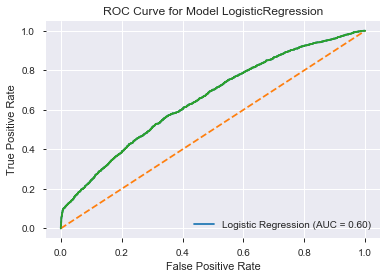

In [435]:
# roc curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# fit a model
model = GridSearchCV(
    estimator = LogisticRegression(random_state=seed),
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 1, 10, 100, 1000]})#, 
    #cv = kfold, 
    #scoring = scoring, 
    #n_jobs = processors)
model.fit(X_train, y_train)
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure()
pyplot.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr)
# show the plot
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve for Model LogisticRegression')
pyplot.legend(loc="lower right")
pyplot.savefig('Log_ROC')
pyplot.show()

In [436]:
from sklearn.metrics import log_loss
# predict probabilities
probs = model.predict_proba(X_test)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate log loss
loss = log_loss(y_test, probs)
print("Log Loss for Logistic Regression")
print(loss)

Log Loss for Logistic Regression
0.6371610474144648


In [437]:
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.63


## Confusion Matrix for Logistic Regression

In [438]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#[row, column]
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

[[2368  623]
 [1292  857]]


## 6. Metrics computed from a confusion matrix
## Classification Accuracy: Overall, how often is the classifier correct?

In [439]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.627431906614786


In [440]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.627431906614786
0.627431906614786


Classification Error: Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [441]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.372568093385214
0.372568093385214


### Sensitivity: When the actual value is positive, how often is the prediction correct?

##Something we want to maximize
##How "sensitive" is the classifier to detecting positive instances?
##Also known as "True Positive Rate" or "Recall"
##TP / all positive
##all positive = TP + FN

In [442]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.39879013494648674
0.39879013494648674


## Specificity: When the actual value is negative, how often is the prediction correct?

#Something we want to maximize
#How "specific" (or "selective") is the classifier in predicting positive instances?
#TN / all negative
#all negative = TN + FP

In [443]:
specificity = TN / (TN + FP)
print(specificity)

0.7917084587094617


In [444]:
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [445]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.20829154129053828
0.20829154129053828


In [446]:
##Precision: When a positive value is predicted, how often is the prediction correct?
##How "precise" is the classifier when predicting positive instances?

In [447]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred))

0.5790540540540541
0.5790540540540541


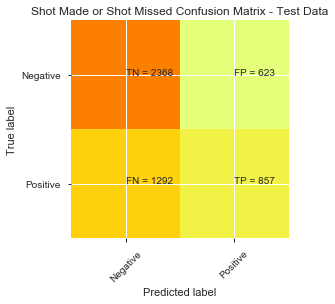

In [448]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Shot Made or Shot Missed Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Linear Discriminant Analysis (LDA) model

In [449]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#model = LDA(n_components=3)
model = LDA(n_components=1, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
X_lda = model.fit_transform(X, y)
kobe_df["PC1"] = X_lda[:,0]

lda_grid = GridSearchCV(
    estimator = LinearDiscriminantAnalysis(),
    param_grid = {
        'solver': ['lsqr'],
        'shrinkage': [0, 0.25, 0.5, 0.75, 1],
        'n_components': [None, 2, 5, 10]
    }, 
    cv = kfold, 
    #scoring = scoring, 
    n_jobs = processors)

lda_grid.fit(X, y)
lda_grid.predict_log_proba(X)

print(lda_grid.best_score_)
print(lda_grid.best_params_)
print(lda_grid.score)
#print(lda_grid.predict_log_proba)
#sns.regplot(data = kobe_df[["PC1","class"]], x = "PC1",y = "class", fit_reg=False,scatter_kws = {'s':50}, )

0.6261431295481963
{'n_components': None, 'shrinkage': 0, 'solver': 'lsqr'}
<bound method BaseSearchCV.score of GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'solver': ['lsqr'], 'shrinkage': [0, 0.25, 0.5, 0.75, 1], 'n_components': [None, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>


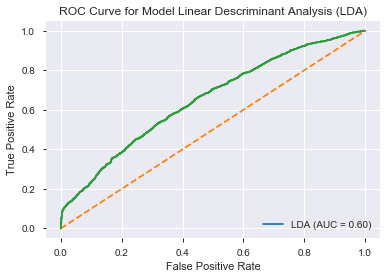

In [450]:
# roc curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
#logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
# fit a model
priors = np.array([.5538, .4461])
model = LDA(n_components=1, priors=priors, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
model.fit(X_train, y_train)
logit_lda_auc = roc_auc_score(y_test, model.predict(X_test))
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure()
pyplot.plot(fpr, tpr, label='LDA (AUC = %0.2f)' % logit_lda_auc)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr)
# show the plot
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve for Model Linear Descriminant Analysis (LDA)')
pyplot.legend(loc="lower right")
pyplot.savefig('Log_ROC')
pyplot.show()

In [451]:
from sklearn.metrics import log_loss
# predict probabilities
probs = model.predict_proba(X_test)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate log loss
loss = log_loss(y_test, probs)
print("Log Loss for Linear Descriminant Analysis (LDA)")
print(loss)

Log Loss for Linear Descriminant Analysis (LDA)
0.6363911683085278


In [452]:
y_pred = model.predict(X_test)
print('Accuracy of LDA classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of LDA classifier on test set: 0.63


## Confusion Matrix for Linear Discriminant Analysis (LDA)

In [453]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#[row, column]
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

[[2328  663]
 [1256  893]]


## 6. Metrics computed from a confusion matrix
## Classification Accuracy: Overall, how often is the classifier correct?

In [454]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.6266536964980545


In [455]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.6266536964980545
0.6266536964980545


Classification Error: Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [456]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.37334630350194553
0.37334630350194553


### Sensitivity: When the actual value is positive, how often is the prediction correct?

##Something we want to maximize
##How "sensitive" is the classifier to detecting positive instances?
##Also known as "True Positive Rate" or "Recall"
##TP / all positive
##all positive = TP + FN

In [457]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.41554211261051655
0.41554211261051655


## Specificity: When the actual value is negative, how often is the prediction correct?

#Something we want to maximize
#How "specific" (or "selective") is the classifier in predicting positive instances?
#TN / all negative
#all negative = TN + FP

In [458]:
specificity = TN / (TN + FP)
print(specificity)

0.7783350050150452


In [459]:
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [460]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.22166499498495487
0.22166499498495484


In [461]:
##Precision: When a positive value is predicted, how often is the prediction correct?
##How "precise" is the classifier when predicting positive instances?

In [462]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred))

0.5739074550128535
0.5739074550128535


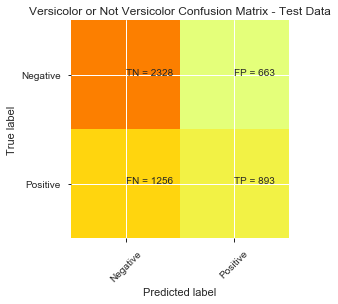

In [463]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [464]:
X.dtypes

attendance                   int64
shot_distance                int64
shot_zone_range_code         int64
game_event_id                int64
shot_zone_basic_code         int64
shot_type_code               int64
shot_zone_area_code          int64
action_type_code             int64
period_code                  int64
combined_shot_type_code      int64
home_play                    int64
avgnoisedb                 float64
dtype: object

# PCA Visualization¶

In [372]:
components = 8
pca = PCA(n_components=components).fit(X)

Show explained variance for each component

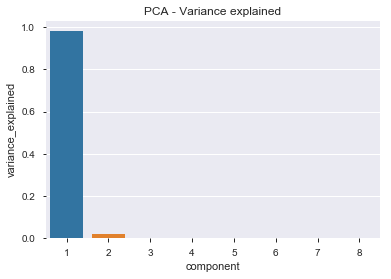

In [373]:
pca_variance_explained_df = pd.DataFrame({
    "component": np.arange(1, components+1),
    "variance_explained": pca.explained_variance_ratio_            
    })

ax = sns.barplot(x='component', y='variance_explained', data=pca_variance_explained_df)
ax.set_title("PCA - Variance explained")
plt.show()

# Make final predictions

In [351]:
#model.fit(X,y)
preds = model.predict_proba(X_test)

submission = pd.DataFrame()
#submission["shot_id"] = data_submit.index
submission["shot_id"] = X.shot_id
submission["shot_made_flag"]= preds[:,0]

submission.to_csv("sub.csv",index=False)

ValueError: Length of values does not match length of index